In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
import os 
bs = 64

In [3]:
path = "cars/"

https://github.com/fastai/fastai/blob/master/courses/dl1/lesson1.ipynb #for dataset loading

In [4]:
os.listdir(path)

['car_00099.jpg',
 'car_00066.jpg',
 'car_00072.jpg',
 'rusty_car_00039.jpg',
 'rusty_car_00011.jpg',
 'rusty_car_00004.jpg',
 'rusty_car_00010.jpg',
 'rusty_car_00038.jpg',
 'car_00073.jpg',
 'car_00067.jpg',
 'car_00098.jpg',
 'car_00059.jpg',
 'car_00071.jpg',
 'car_00065.jpg',
 'rusty_car_00006.jpg',
 'rusty_car_00012.jpg',
 'rusty_car_00013.jpg',
 'rusty_car_00007.jpg',
 'car_00064.jpg',
 'car_00070.jpg',
 'car_00058.jpg',
 'car_00074.jpg',
 'car_00060.jpg',
 'car_00048.jpg',
 'rusty_car_00003.jpg',
 'rusty_car_00017.jpg',
 'car_00100.jpg',
 'rusty_car_00016.jpg',
 'rusty_car_00002.jpg',
 'car_00049.jpg',
 'car_00061.jpg',
 'car_00075.jpg',
 'car_00088.jpg',
 'car_00063.jpg',
 'car_00077.jpg',
 'rusty_car_00014.jpg',
 'rusty_car_00028.jpg',
 'rusty_car_00029.jpg',
 'rusty_car_00015.jpg',
 'car_00076.jpg',
 'car_00062.jpg',
 'car_00089.jpg',
 'car_00039.jpg',
 'car_00005.jpg',
 'car_00011.jpg',
 'rusty_car_00072.jpg',
 'rusty_car_00066.jpg',
 'rusty_car_00067.jpg',
 'rusty_car_0007

In [5]:
fnames = get_image_files(path)
fnames[:5]

[PosixPath('cars/car_00099.jpg'),
 PosixPath('cars/car_00066.jpg'),
 PosixPath('cars/car_00072.jpg'),
 PosixPath('cars/rusty_car_00039.jpg'),
 PosixPath('cars/rusty_car_00011.jpg')]

In [6]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [7]:
data = ImageDataBunch.from_name_re(path, fnames, pat, ds_tfms = get_transforms(), size = 224, bs = bs
                                  ).normalize(imagenet_stats)  #makes a databunch which contains the td,td,vd

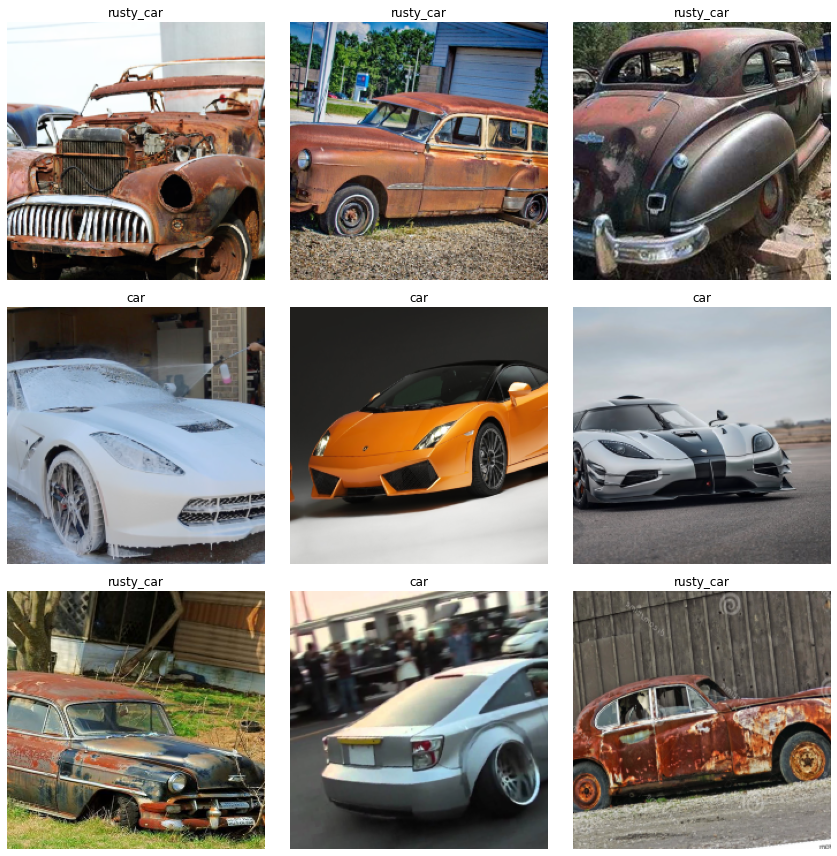

In [8]:
data.show_batch(rows = 3, fig_size =(2,2))

In [9]:
print(data.classes)
data.c

['car', 'rusty_car']


2

# Training the network

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [11]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
learn.fit_one_cycle(2) ### train for 2 epochs 

epoch,train_loss,valid_loss,error_rate,time


In [ ]:
learn.save('first_model')

# Models

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()


In [ ]:
len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_top_losses(2, figsize = (12,8))

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=2)